# Objective

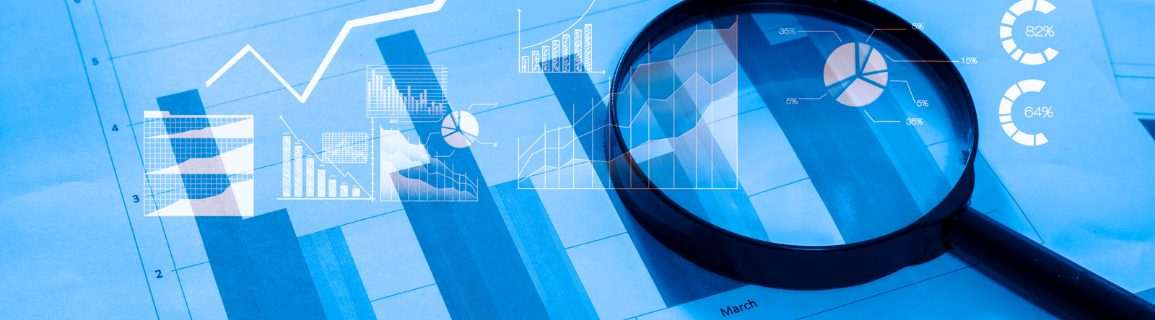



*   In this step, our objective is to discover patterns, spot anomalies, test hypothesis and check assumptions.



# 1. Library imports

In [ ]:
import math
import numpy as np
import pandas as pd
import inflection
import seaborn as sns
from scipy import stats as ss
from matplotlib import pyplot as plt
from sklearn.preprocessing import RobustScaler, MinMaxScaler, LabelEncoder

##Helper Functions

In [ ]:
def cramer_v( x, y ):
  #17min  ultimo EDA
  cm = pd.crosstab( x, y ).values
  n = cm.sum()
  r, k = cm.shape
  chi2 = ss.chi2_contingency( cm )[0]
  chi2corr = max( 0, chi2 - (k-1)*(r-1)/(n-1) )
  kcorr = k - (k-1)**2/(n-1)
  rcorr = r - (r-1)**2/(n-1)
  return np.sqrt( (chi2corr/n) / ( min( kcorr-1, rcorr-1 ) ) )


#2. Loading Data

In [ ]:
#Copying the dataframe obtained in the previous step
df4 = df3.copy()


#3. EDA -  Exploratory Data Analysis

From EDA we can:

- scale our business experience
- validate hypotheses to generate insights
- generating a deeper understanding of variables that may be important for the model

## Analise univariada

Here we observe one variable at a time, characteristics such as min, max, distribution, range...

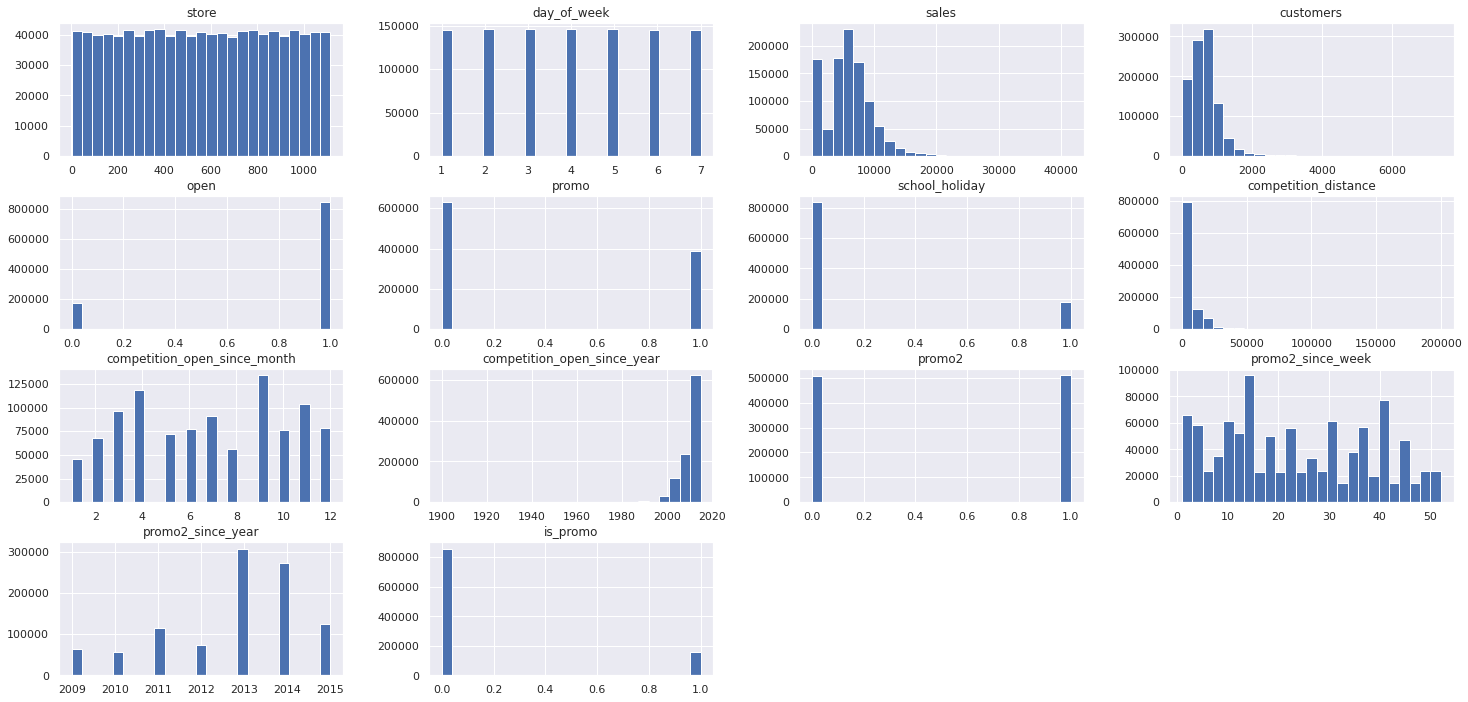

In [ ]:
num_attributes.hist( bins=25 );

In [ ]:
#Categorical variable

Above, we can see the holidays with the highest sales volume. The type of store with the most sales and the assortment with the least sales: extra.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


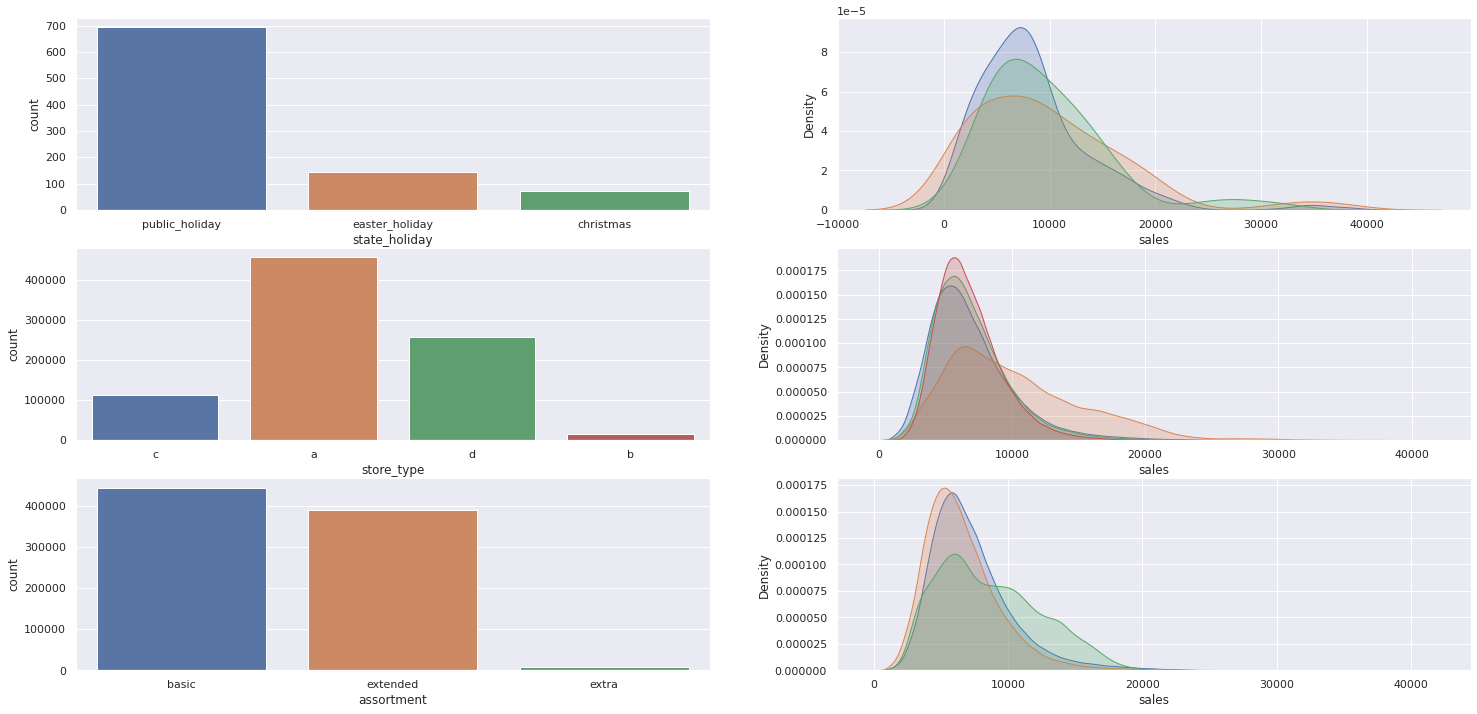

In [ ]:
# state_holiday

plt.subplot( 3, 2, 1 )
a = df4[df4['state_holiday'] != 'regular_day']
sns.countplot( a['state_holiday'] )
plt.subplot( 3, 2, 2 )
sns.kdeplot( df4[df4['state_holiday'] == 'public_holiday']['sales'],label='public_holiday', shade=True )
sns.kdeplot( df4[df4['state_holiday'] == 'easter_holiday']['sales'],label='easter_holiday', shade=True )
sns.kdeplot( df4[df4['state_holiday'] == 'christmas']['sales'],label='christmas', shade=True )

# store_type
plt.subplot( 3, 2, 3 )
sns.countplot( df4['store_type'] )
plt.subplot( 3, 2, 4 )
sns.kdeplot( df4[df4['store_type'] == 'a']['sales'], label='a', shade=True )
sns.kdeplot( df4[df4['store_type'] == 'b']['sales'], label='b', shade=True )
sns.kdeplot( df4[df4['store_type'] == 'c']['sales'], label='c', shade=True )
sns.kdeplot( df4[df4['store_type'] == 'd']['sales'], label='d', shade=True )

# assortment
plt.subplot( 3, 2, 5 )
sns.countplot( df4['assortment'] )
plt.subplot( 3, 2, 6 )
sns.kdeplot( df4[df4['assortment'] == 'extended']['sales'], label='extended',shade=True )
sns.kdeplot( df4[df4['assortment'] == 'basic']['sales'], label='basic',shade=True )
sns.kdeplot( df4[df4['assortment'] == 'extra']['sales'], label='extra',shade=True )

## Analise bivariada

###H1. Stores with larger assortments should sell more. -> FALSE.

In [1]:
#Stores with BIGGEST ASSORTMENT sell LESS

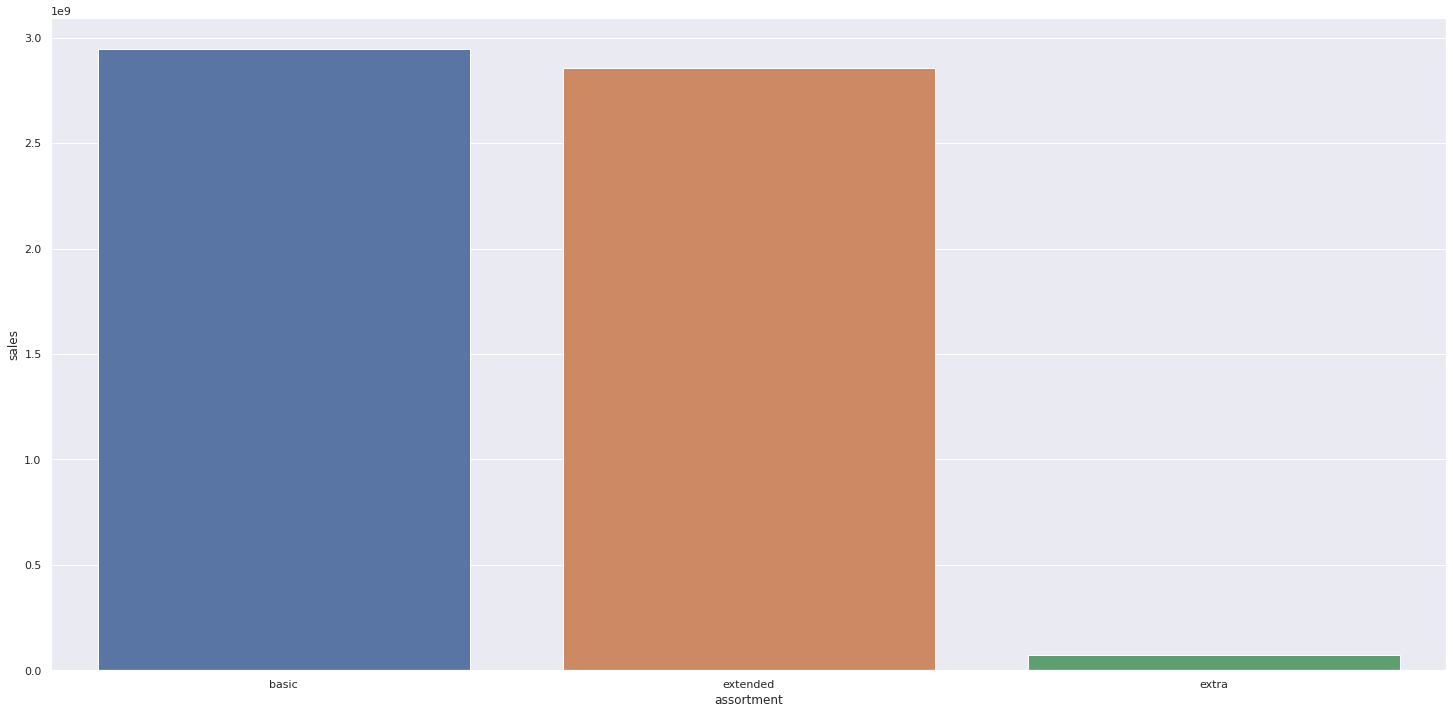

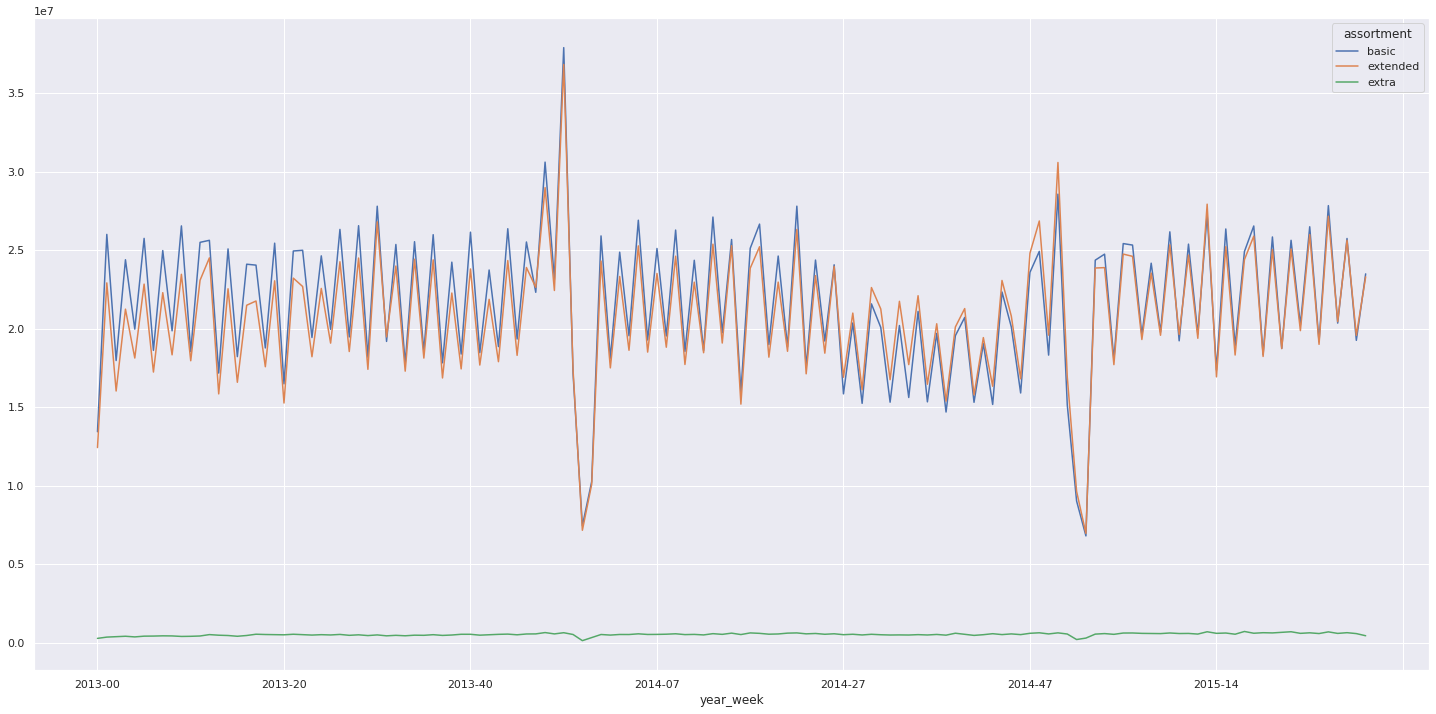

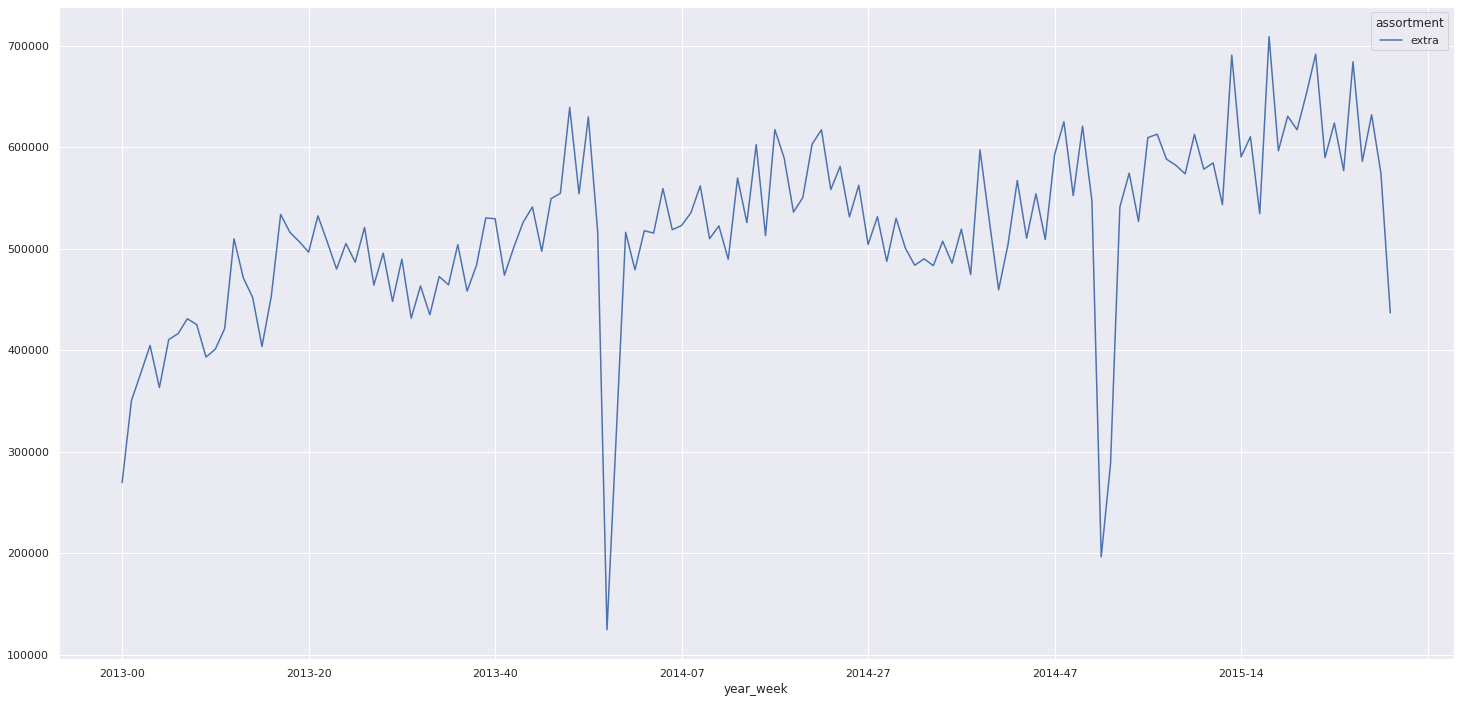

In [ ]:
#type of sales per bag assortment
aux1 = df4[['assortment', 'sales']].groupby( 'assortment' ).sum().reset_index()
sns.barplot( x='assortment', y='sales', data=aux1 );

#Observing sales by assortment each week
aux2 = df4[['year_week', 'assortment', 'sales']].groupby(['year_week','assortment'] ).sum().reset_index()
#if you look at the aux2 above you will see that it still needs to be pivoted...
aux2.pivot( index='year_week', columns='assortment', values='sales' ).plot()

#observando extra no detalhe
aux3 = aux2[aux2['assortment'] == 'extra']
aux3.pivot( index='year_week', columns='assortment', values='sales' ).plot()

###H2. Stores with closer competitors should sell less. -> FALSE

In [ ]:
#FALSE - Stores with NEAREST COMPETITORS sell MORE.

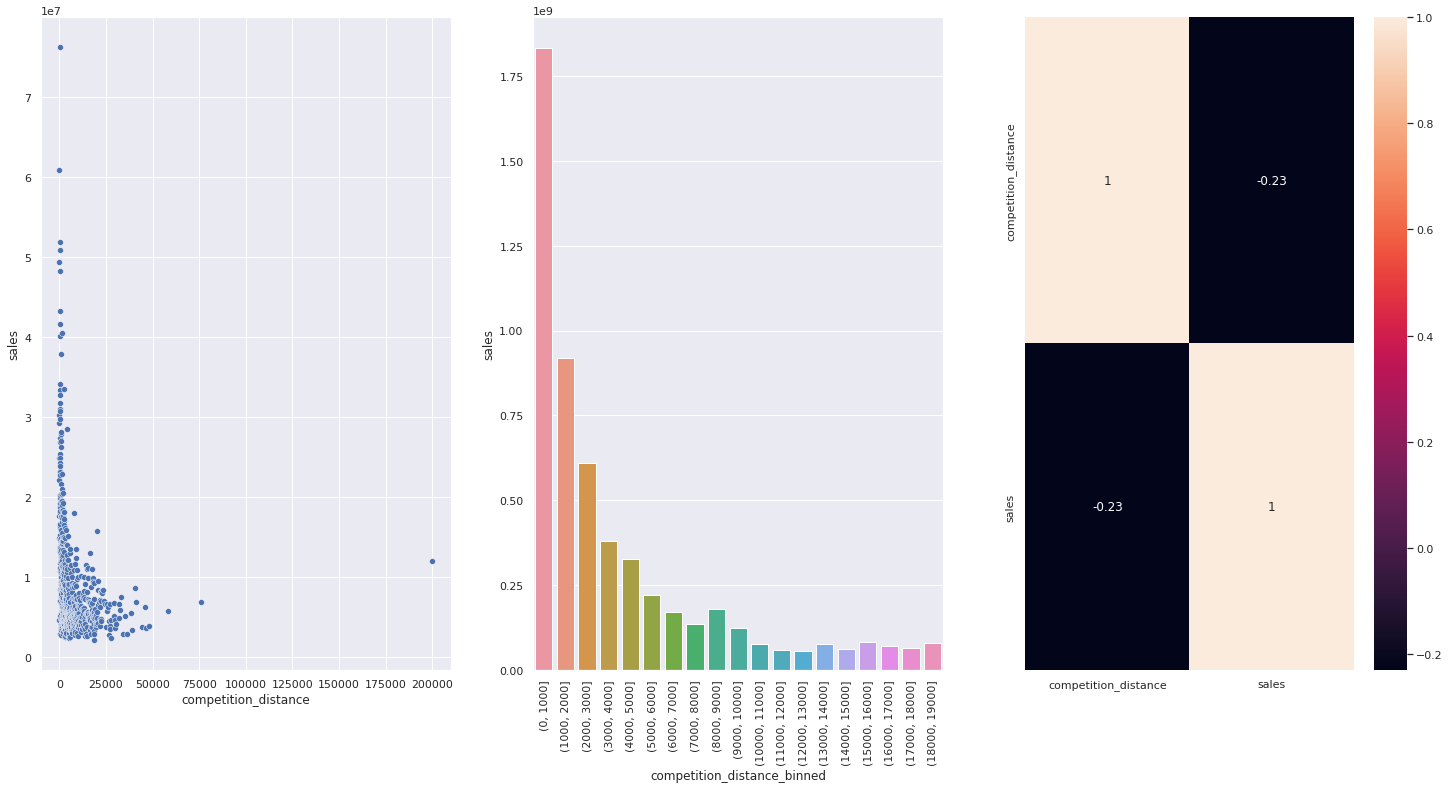

In [ ]:
aux1 = df4[['competition_distance', 'sales']].groupby( 'competition_distance' ).sum().reset_index()
plt.subplot( 1, 3, 1 )
sns.scatterplot( x ='competition_distance', y='sales', data=aux1 );

plt.subplot( 1, 3, 2 )
#for a better view...
bins = list( np.arange( 0, 20000, 1000) )
aux1['competition_distance_binned'] = pd.cut( aux1['competition_distance'],bins=bins )

#suming sales in groups
aux2 = aux1[['competition_distance_binned', 'sales']].groupby('competition_distance_binned' ).sum().reset_index()
sns.barplot( x='competition_distance_binned', y='sales', data=aux2 );
plt.xticks( rotation=90 );


plt.subplot( 1, 3, 3 )
sns.heatmap( aux1.corr( method='pearson' ), annot=True );


###H3. Stores with longer competitors should sell more. FALSE

In [ ]:
#FALSE Stores with LONGER COMPETITORS sell LESS

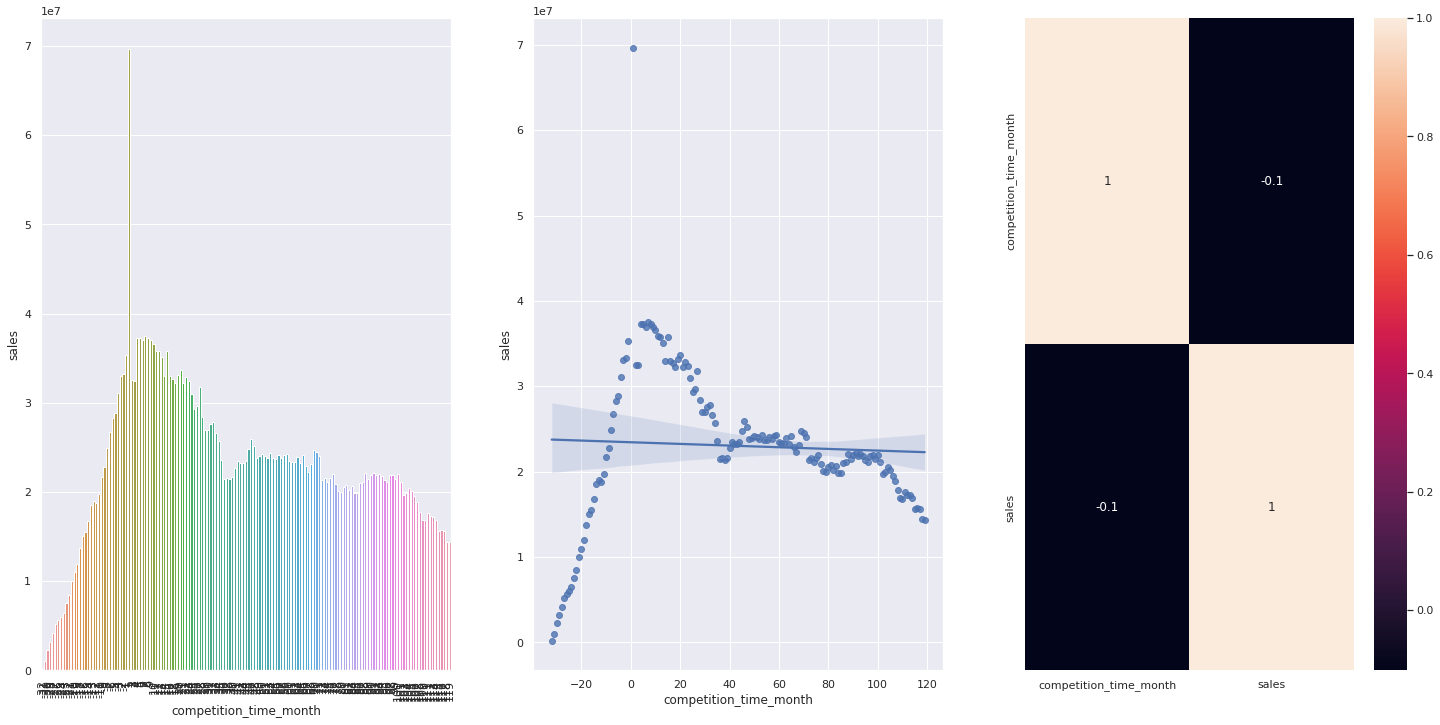

In [ ]:
plt.subplot( 1, 3, 1 )
aux1 = df4[['competition_time_month', 'sales']].groupby('competition_time_month' ).sum().reset_index()

#creating filter to view better
aux2 = aux1[( aux1['competition_time_month'] < 120 ) & (aux1['competition_time_month'] != 0 )]
sns.barplot( x='competition_time_month', y='sales', data=aux2 );
plt.xticks( rotation=90 );

#watching trend
plt.subplot( 1, 3, 2 )
sns.regplot( x='competition_time_month', y='sales', data=aux2 );

#correlation
plt.subplot( 1, 3, 3 )
sns.heatmap( aux1.corr( method='pearson'), annot=True );


### **H4.** Stores running promo should sell more

In [3]:
# TRUE -  On average stores tend to sell more in promo.

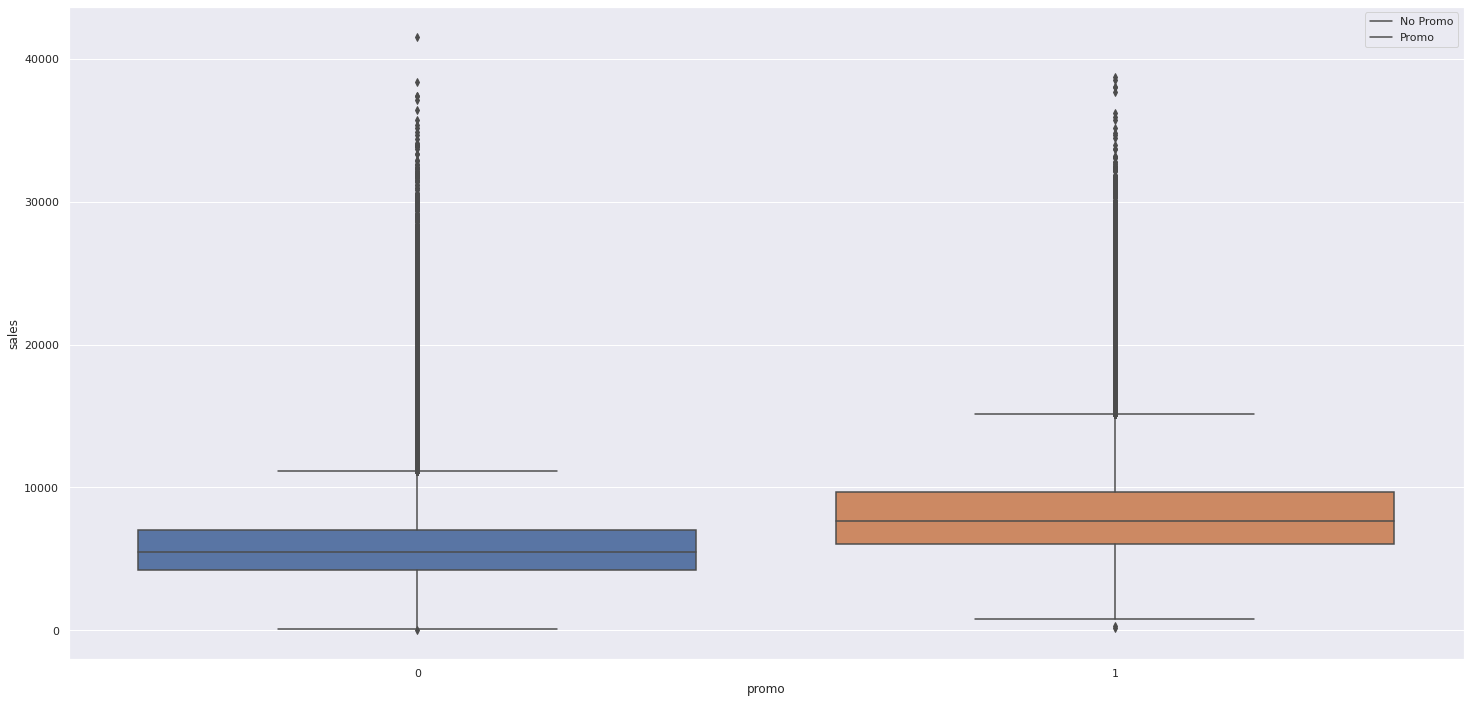

In [ ]:
aux1 = df4[[ 'sales', 'promo']]#.groupby('promo').sum().reset_index()
ax = sns.boxplot( x = 'promo', y = 'sales', data = aux1 );
ax.legend(['No Promo', 'Promo']);


In [ ]:
#FALSE Stores with active promotions for longer sell less, after a certain period of promotion

### **H5.** Stores with extended promo for longer periods should sell more

In [2]:
# FALSE -  After around 100 to 200 weeks of consecutive promo sales start to decrease

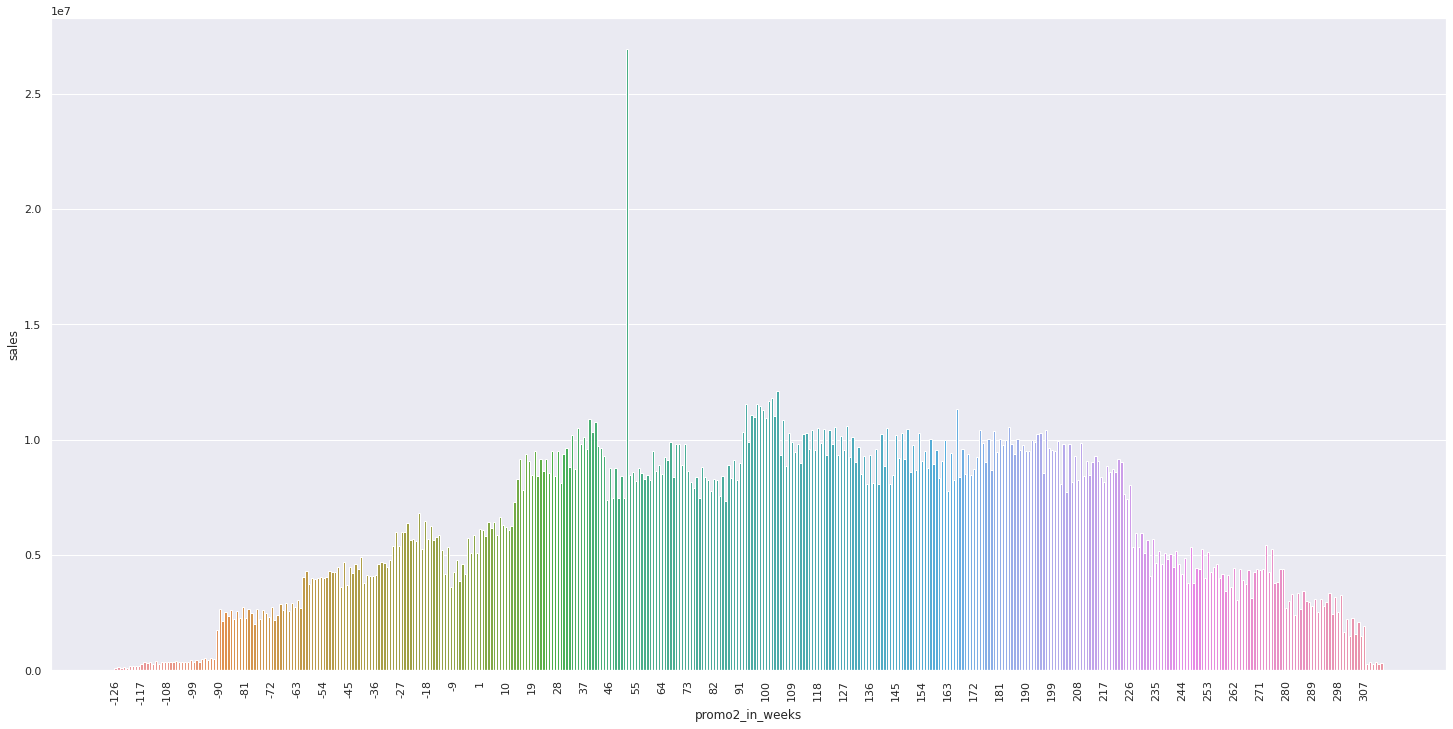

In [ ]:
aux1 = df4[[ 'promo2_in_weeks', 'sales']].copy().groupby( 'promo2_in_weeks').sum().reset_index()

sns.barplot( x = 'promo2_in_weeks', y = 'sales', data = aux2);
plt.xticks( rotation = 90);
plt.locator_params( axis = 'x', nbins = 50)

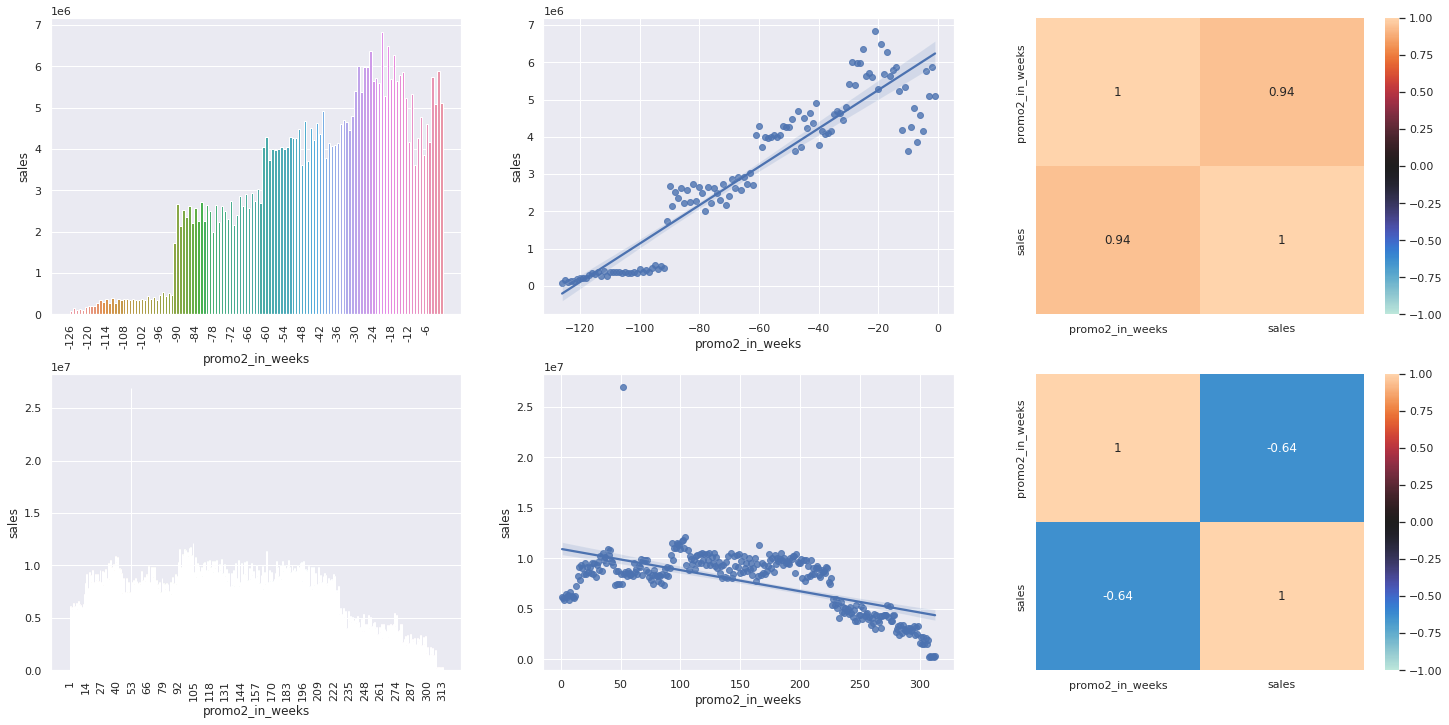

In [ ]:
#promo2_in_weeks
aux1 = df4[[ 'promo2_in_weeks', 'sales']].copy().groupby( 'promo2_in_weeks').sum().reset_index()
aux2 = aux1.loc[ aux1['promo2_in_weeks'] < 0].copy() #data before promo2 starts
aux3 = aux1.loc[ aux1['promo2_in_weeks'] > 0].copy() #data after promo2 starts

grid = GridSpec( 2, 3 )

plt.subplot( grid[0,0] )
sns.barplot( x = 'promo2_in_weeks', y = 'sales', data = aux2);
plt.xticks( rotation = 90);
plt.locator_params( axis = 'x', nbins = 25)

plt.subplot( grid[0,1] )
sns.regplot( x = 'promo2_in_weeks', y = 'sales', data = aux2);

plt.subplot( grid[1,0] )
sns.barplot( x = 'promo2_in_weeks', y = 'sales', data = aux3);
plt.xticks( rotation = 90);
plt.locator_params( axis = 'x', nbins = 25)

plt.subplot( grid[1,1] )
sns.regplot( x = 'promo2_in_weeks', y = 'sales', data = aux3);

plt.subplot( grid[0,2] )
sns.heatmap( aux2.corr( method = 'pearson') , annot= True, vmin = -1, vmax = 1, cmap = 'icefire');

plt.subplot( grid[1,2] )
sns.heatmap( aux3.corr( method = 'pearson') , annot= True, vmin = -1, vmax = 1, cmap = 'icefire');


### **H6.** Stores running extended promo should sell more


In [ ]:
# FALSE - Stores running extended promo sell less than thouse running only traditional promo

In [ ]:
aux = df4[['promo', 'promo2', 'sales']].copy().groupby( ['promo','promo2'] ).mean().reset_index()
aux.sort_values( 'sales', ascending= False)


promo  promo2        sales
2      1       0  8618.452062
3      1       1  7836.672987
0      0       0  6328.187633
1      0       1  5529.566684

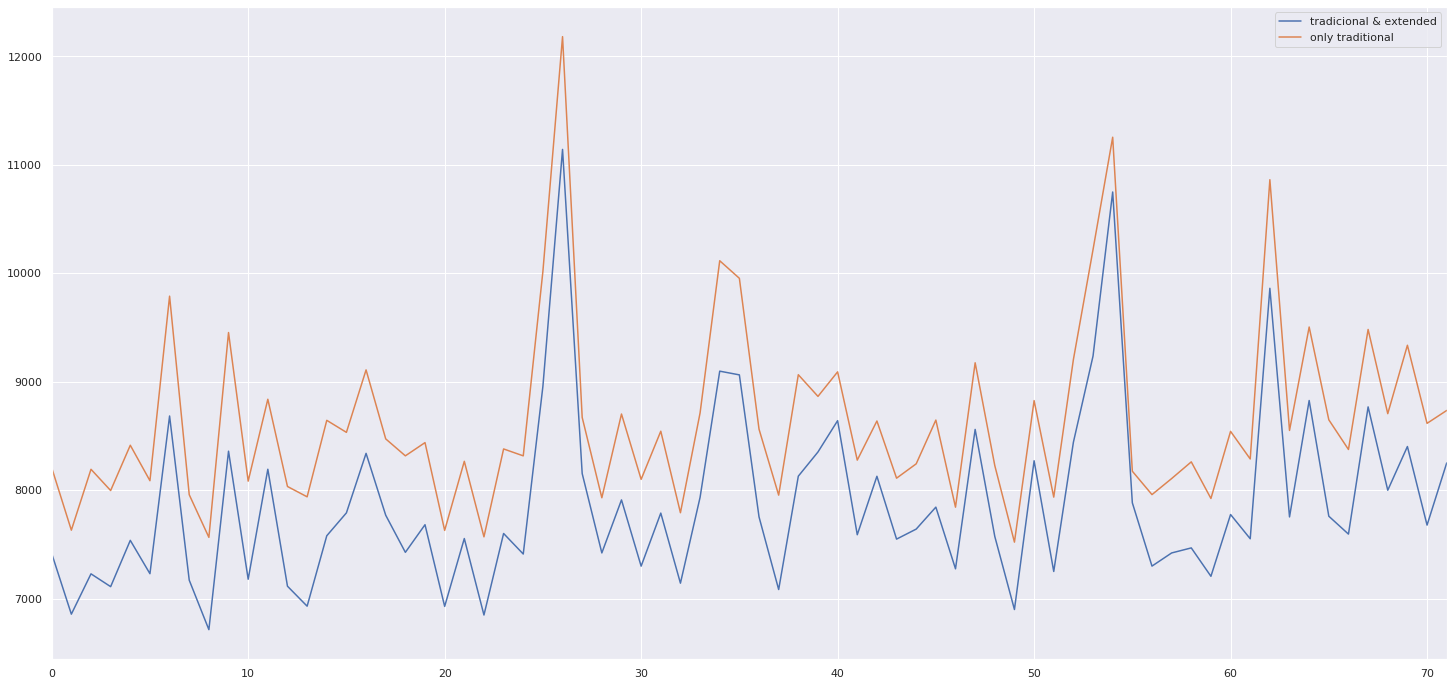

In [ ]:
#store participates in both promos
aux1 = df4[( df4['promo'] == 1 ) & ( df4['promo2'] == 1)][['year_week','sales']].groupby( 'year_week' ).mean().reset_index()
ax = aux1.plot()

#store participates only in normal promo
aux2 = df4[( df4['promo'] == 1 ) & ( df4['promo2'] != 1)][['year_week','sales']].groupby( 'year_week' ).mean().reset_index()
a = aux2.plot( ax = ax )

ax.legend(labels = ['tradicional & extended', 'only traditional']);


###H7. Stores with more consecutive promotions should sell more

In [ ]:
#FALSA - Stores with more consecutive promotions sell less

In [ ]:
df4[['promo', 'promo2', 'sales']].groupby( ['promo', 'promo2'] ).sum().reset_index()


promo  promo2       sales
0      0       0  1482612096
1      0       1  1289362241
2      1       0  1628930532
3      1       1  1472275754

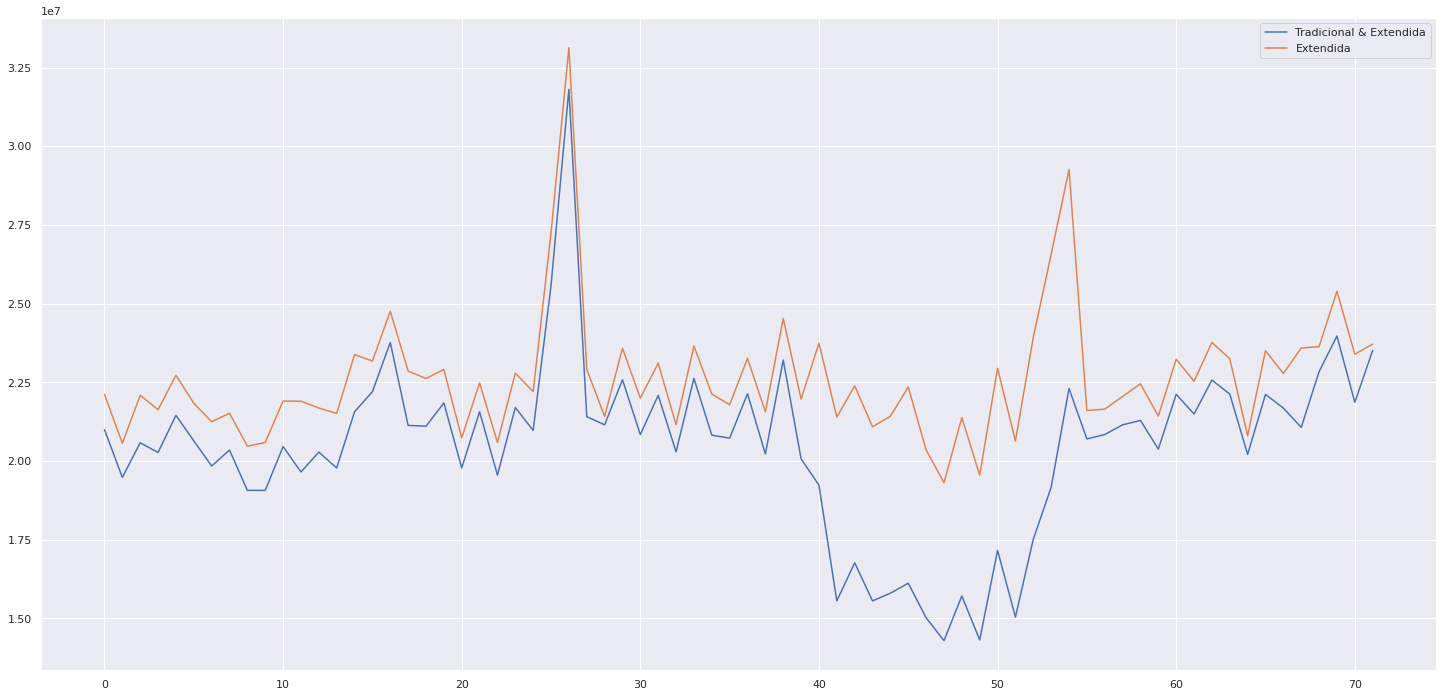

In [ ]:
# How was the behavior for the variables over time?

aux1 = df4[( df4['promo'] == 1 ) & ( df4['promo2'] == 1 )][['year_week','sales']].groupby( 'year_week' ).sum().reset_index()
ax = aux1.plot()
aux2 = df4[( df4['promo'] == 1 ) & ( df4['promo2'] == 0 )][['year_week','sales']].groupby( 'year_week' ).sum().reset_index()
aux2.plot( ax=ax )
ax.legend( labels=['Tradicional & Extendida', 'Extendida']);

###H8. Stores open during the Christmas holiday should sell more

In [ ]:
#False - They actually sell less as we can see in the plotted graphs.

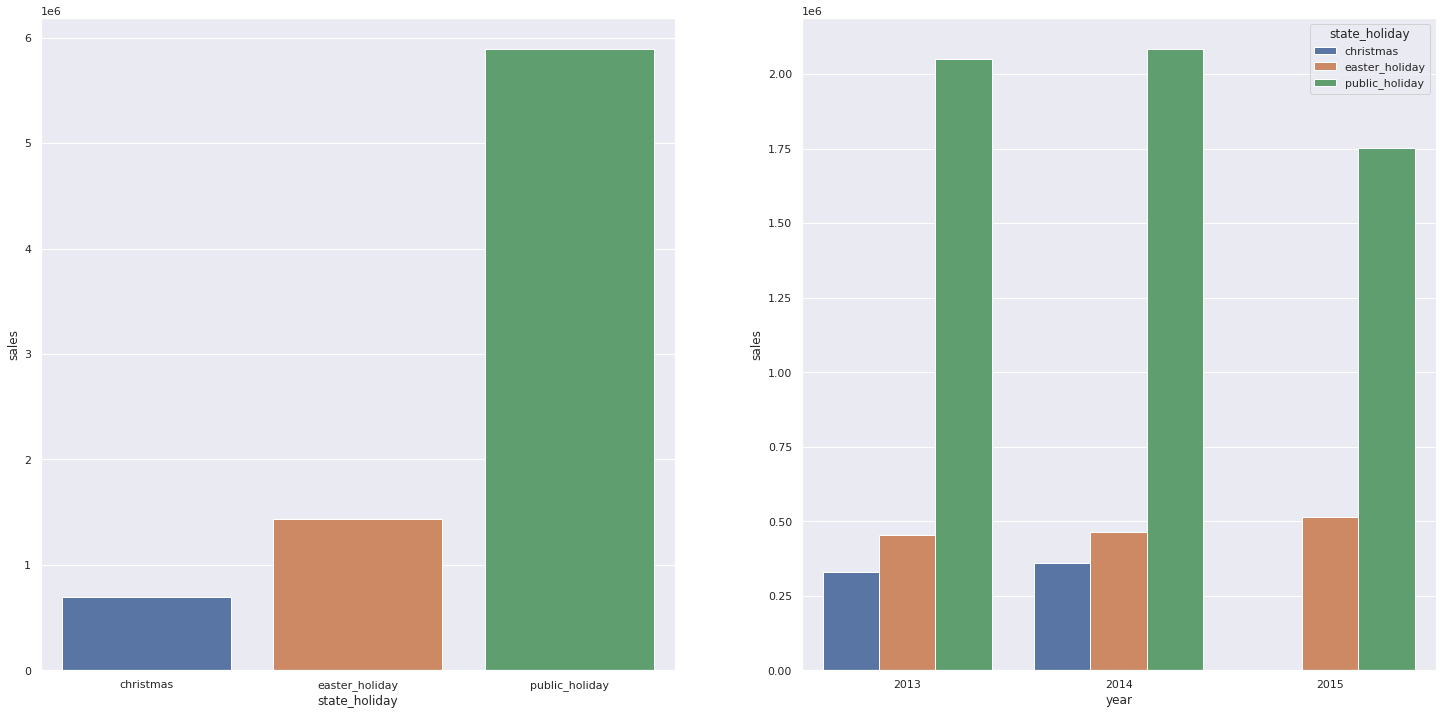

In [ ]:
aux = df4[df4['state_holiday'] != 'regular_day']

plt.subplot( 1, 2, 1 )
aux1 = aux[['state_holiday', 'sales']].groupby( 'state_holiday' ).sum().reset_index()
sns.barplot( x='state_holiday', y='sales', data=aux1 );

plt.subplot( 1, 2, 2 )
aux2 = aux[['year', 'state_holiday', 'sales']].groupby( ['year','state_holiday'] ).sum().reset_index()
sns.barplot( x='year', y='sales', hue='state_holiday', data=aux2 );

###H9. Stores should sell more over the years

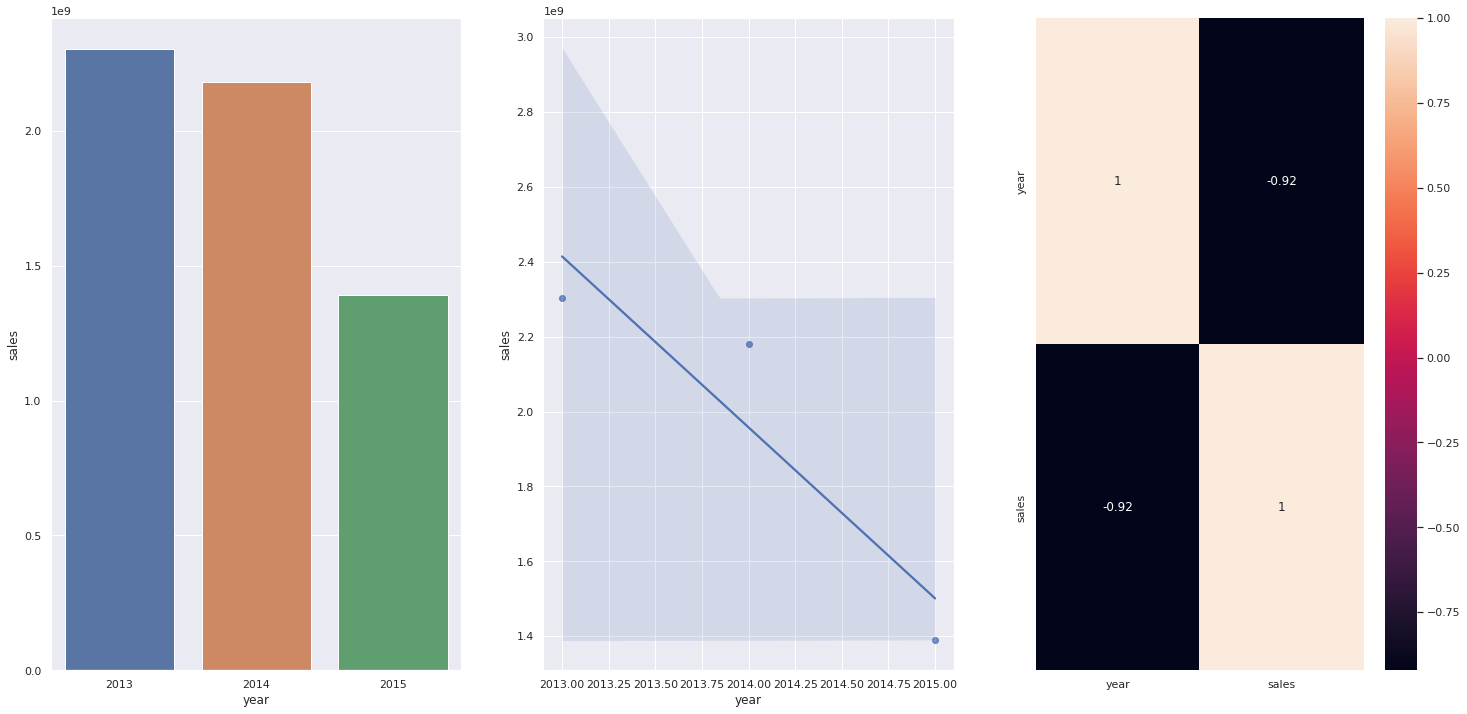

In [ ]:
aux1 = df4[['year', 'sales']].groupby( 'year' ).sum().reset_index()
plt.subplot( 1, 3, 1 )
sns.barplot( x='year', y='sales', data=aux1 );
plt.subplot( 1, 3, 2 )
sns.regplot( x='year', y='sales', data=aux1 );
plt.subplot( 1, 3, 3 )
sns.heatmap( aux1.corr( method='pearson' ), annot=True );

### H10. Stores should sell more in the second half of the year.

In [ ]:
#FALSE -  Stores sell less in the second half of the year

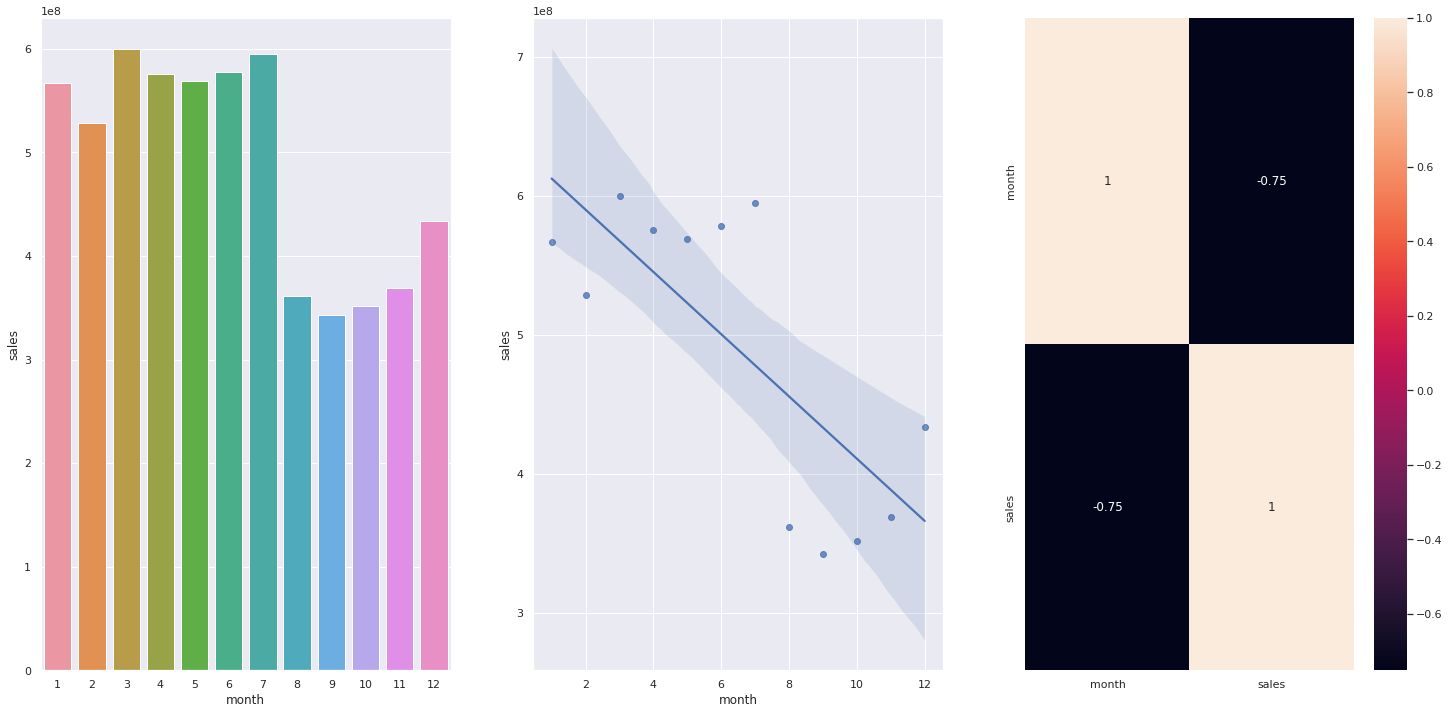

In [ ]:
aux1 = df4[['month', 'sales']].groupby( 'month' ).sum().reset_index()
plt.subplot( 1, 3, 1 )
sns.barplot( x='month', y='sales', data=aux1 );
plt.subplot( 1, 3, 2 )
sns.regplot( x='month', y='sales', data=aux1 );
plt.subplot( 1, 3, 3 )
sns.heatmap( aux1.corr( method='pearson' ), annot=True );


### H11. Stores should sell more after the 10th of each month.

In [ ]:
#TRUE - Stores sell more after the 10th of each month.

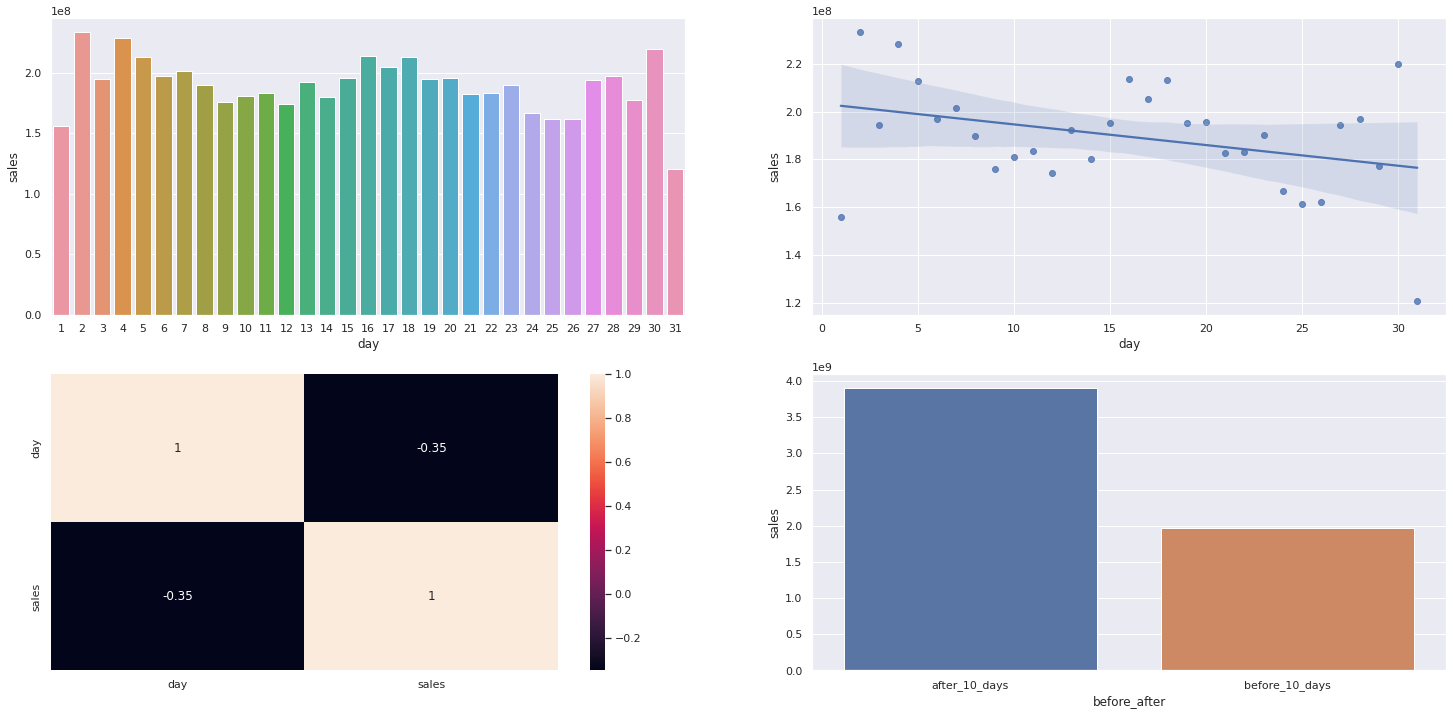

In [ ]:
aux1 = df4[['day', 'sales']].groupby( 'day' ).sum().reset_index()

plt.subplot( 2, 2, 1 )
sns.barplot( x='day', y='sales', data=aux1 );

plt.subplot( 2, 2, 2 )
sns.regplot( x='day', y='sales', data=aux1 );

plt.subplot( 2, 2, 3 )
sns.heatmap( aux1.corr( method='pearson' ), annot=True );

aux1['before_after'] = aux1['day'].apply( lambda x: 'before_10_days' if x <= 10 else 'after_10_days' )
aux2 =aux1[['before_after', 'sales']].groupby( 'before_after' ).sum().reset_index()

plt.subplot( 2, 2, 4 )
sns.barplot( x='before_after', y='sales', data=aux2 );


###H12. Stores should sell less on weekends.

In [ ]:
#TRUE - Stores sell less on weekends

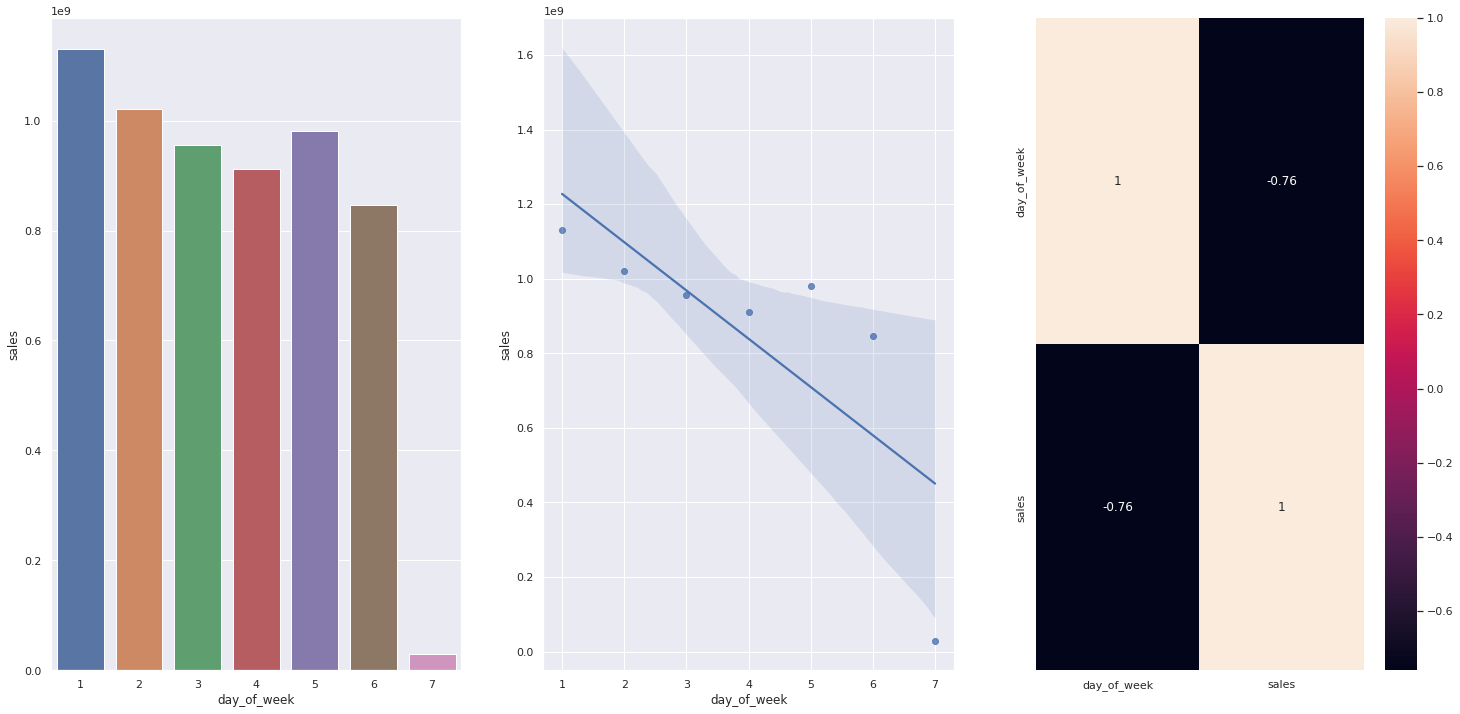

In [ ]:
 aux1 = df4[['day_of_week', 'sales']].groupby( 'day_of_week' ).sum().reset_index()

plt.subplot( 1, 3, 1 )
sns.barplot( x='day_of_week', y='sales', data=aux1 );

plt.subplot( 1, 3, 2 )
sns.regplot( x='day_of_week', y='sales', data=aux1 );

plt.subplot( 1, 3, 3 )
sns.heatmap( aux1.corr( method='pearson' ), annot=True );


###H13. Stores should sell less during school holidays.

In [ ]:
#TRUE - Stores sell less during school holidays, except July and August

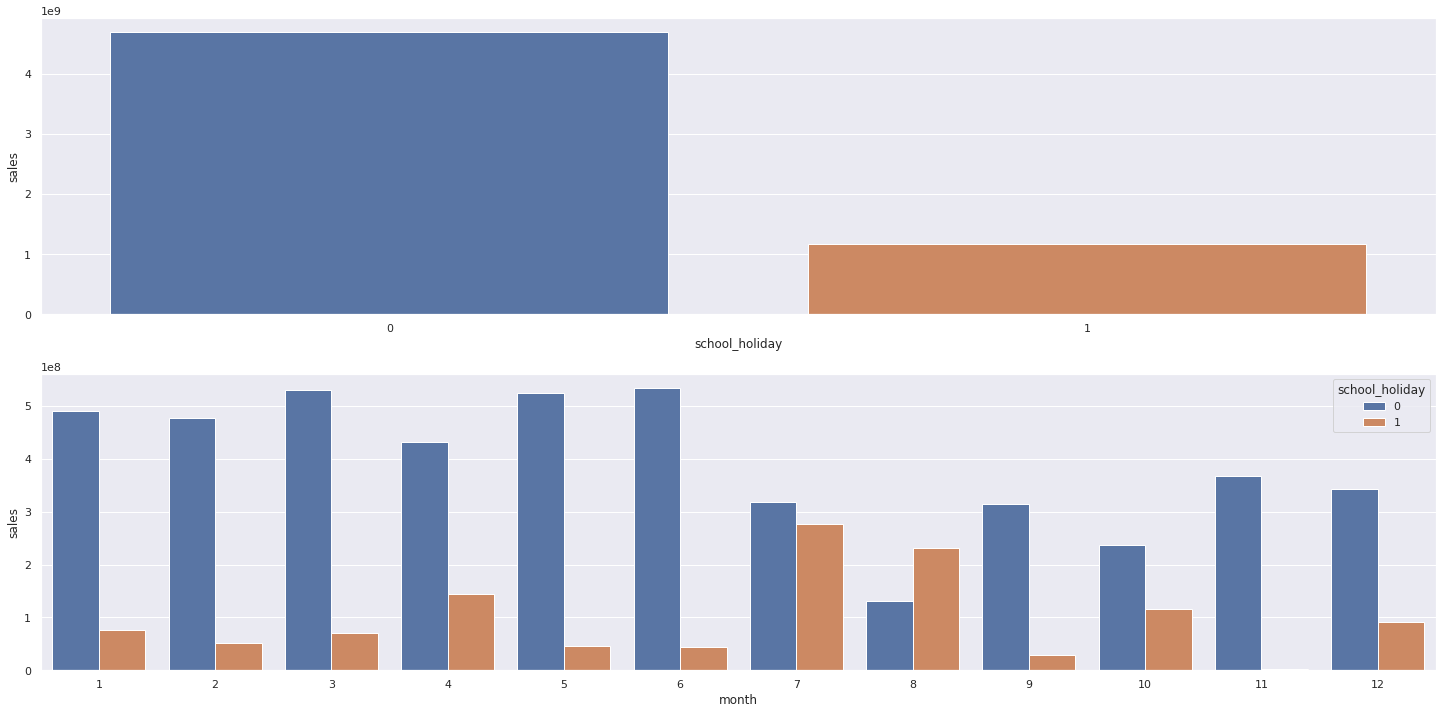

In [ ]:
aux1 = df4[['school_holiday', 'sales']].groupby( 'school_holiday' ).sum().reset_index()

plt.subplot( 2, 1, 1 )
sns.barplot( x='school_holiday', y='sales', data=aux1 );

aux2 = df4[['month', 'school_holiday', 'sales']].groupby(['month','school_holiday'] ).sum().reset_index()
plt.subplot( 2, 1, 2 )
sns.barplot( x='month', y='sales', hue='school_holiday', data=aux2 );

In [ ]:
#Resumo
from tabulate import tabulate
tab =[['Hipoteses', 'Conclusao', 'Relevancia'],
['H1', 'Falsa', 'Baixa'],
['H2', 'Falsa', 'Media'],
['H3', 'Falsa', 'Media'],
['H4', 'Falsa', 'Baixa'],
['H5', '-', '-'],
['H7', 'Falsa', 'Baixa'],
['H8', 'Falsa', 'Media'],
['H9', 'Falsa', 'Alta'],
['H10', 'Falsa', 'Alta'],
['H11', 'Verdadeira', 'Alta'],
['H12', 'Verdadeira', 'Alta'],
['H13', 'Verdadeira', 'Baixa'],
]
print( tabulate( tab, headers='firstrow' ) )


Hipoteses    Conclusao    Relevancia
-----------  -----------  ------------
H1           Falsa        Baixa
H2           Falsa        Media
H3           Falsa        Media
H4           Falsa        Baixa
H5           -            -
H7           Falsa        Baixa
H8           Falsa        Media
H9           Falsa        Alta
H10          Falsa        Alta
H11          Verdadeira   Alta
H12          Verdadeira   Alta
H13          Verdadeira   Baixa


## Multivariate analysis

Here we simultaneously observe several variables from their correlation

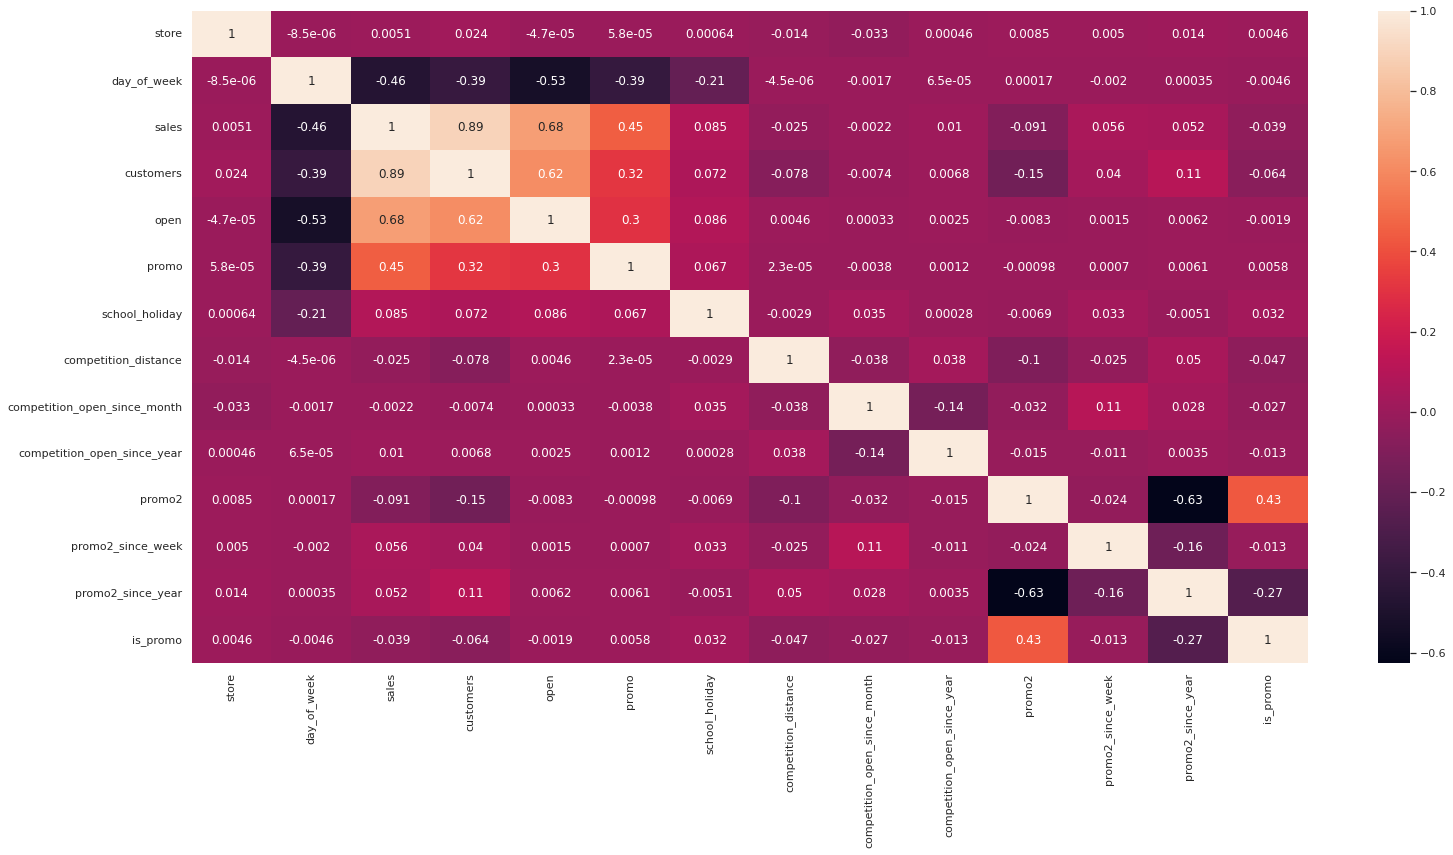

In [ ]:
#Numerical Attributes

correlation = num_attributes.corr( method='pearson' )
sns.heatmap( correlation, annot=True );


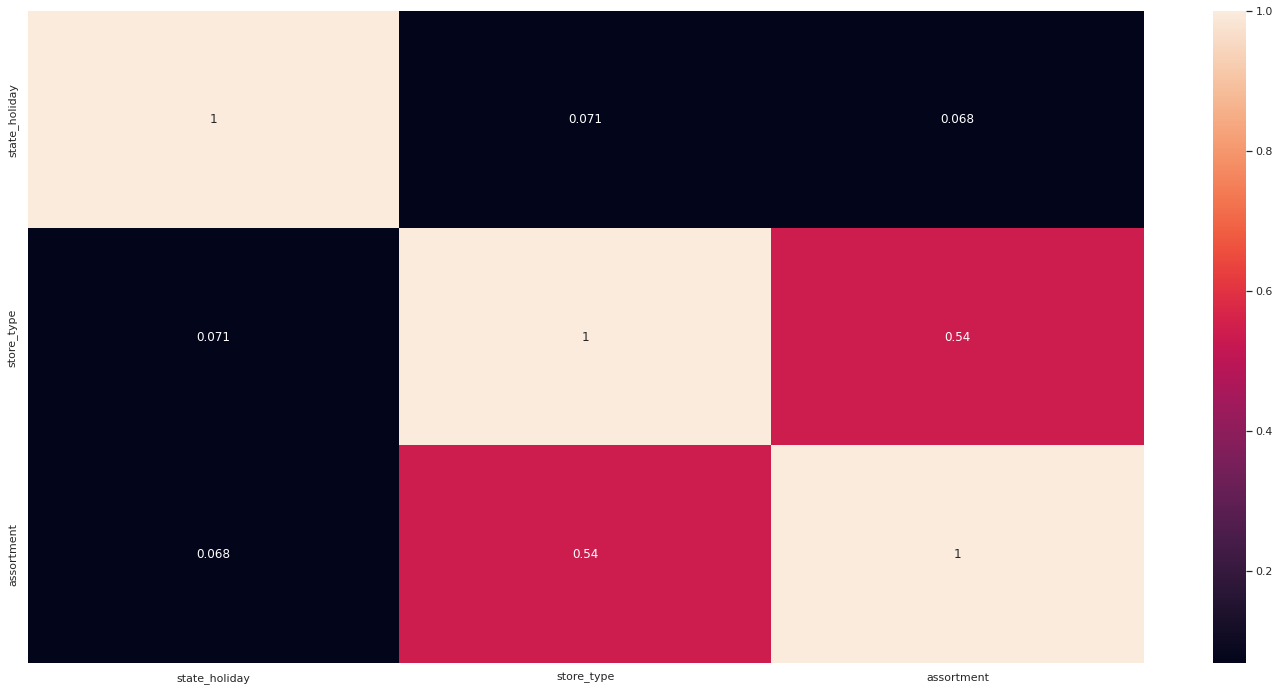

In [ ]:
# only categorical data
a = df4.select_dtypes( include='object' )

# Calculate cramer V
a1 = cramer_v( a['state_holiday'], a['state_holiday'] )
a2 = cramer_v( a['state_holiday'], a['store_type'] )
a3 = cramer_v( a['state_holiday'], a['assortment'] )
a4 = cramer_v( a['store_type'], a['state_holiday'] )
a5 = cramer_v( a['store_type'], a['store_type'] )
a6 = cramer_v( a['store_type'], a['assortment'] )
a7 = cramer_v( a['assortment'], a['state_holiday'] )
a8 = cramer_v( a['assortment'], a['store_type'] )
a9 = cramer_v( a['assortment'], a['assortment'] )

# Final dataset
d = pd.DataFrame( {'state_holiday': [a1, a2, a3],
'store_type': [a4, a5, a6],
'assortment': [a7, a8, a9] })
d = d.set_index( d.columns )

sns.heatmap( d, annot=True )